# Agregações e operações em grupos

Livros para consulta: 
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

# Sumário <a name='contents'><a/>
1. [Introdução](#Intro)
    1. [Carregando o dataframe SINASC](#read)
    2. [GroupBy: Dividir, aplicar, combinar (Split, Apply, Combine)](#SplitApplyCombine)
    3. [Pivot table](#PivotTable)
    4. [GroupBy DTNASC e contagem da IDADEMAE](#GB)
    5. [Pivot table DTNASC e contagem da IDADEMAE](#PivotT)
2. [Exemplos base real](#Ex.RealBase)
    1. [Agregações](#aggregations)
    2. [GroupBy DTNASC e contagem da IDADEMAE](#GBDataIdade)
    3. [GroupBy DTNASC e média da IDADEMAE](#GBDataMediaIdade)
    4. [Outros exemplos](#Ex)
3. [Método aggregate](#aggregate)
4. [Método apply do groupby](#applyGroupby)
5. [Mapping](#mapping)
6. [Tabela pivô (Pivot table)](#TabelaPivo)

# 1- Introdução <a name='Intro'><a/>

In [5]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

# 1.1 - Carregando o dataframe SINASC <a name="read"></a>

<div style="text-align: right"  
    
[Voltar ao sumário](#contents)


SINASC - Sistema de Informações de Nascidos Vivos

     
O DATASUS desenvolveu o Sistema de Informações sobre Nascidos Vivos (SINASC) visando reunir informações epidemiológicas referentes aos nascimentos informados em todo território nacional. Sua implantação ocorreu de forma lenta e gradual em todas as Unidades da Federação.     
     
http://www2.datasus.gov.br/DATASUS/index.php?area=060702

In [7]:
# Carregando o DataFrame
df_raw = pd.read_csv('SINASC_RO_2019.csv')
print(df_raw.shape)
df_raw.head()

(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# 1.2 - GroupBy: Dividir, aplicar, combinar (Split, Apply, Combine) <a name='SplitApplyCombine'><a/>
<div style="text-align: right"  
    
[Voltar ao sumário](#contents)

- O nome GroupBy é derivado do SQL.

<img src="split-apply-combine.png" width="600" align="center">


https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

In [11]:
# Testando o método do GroupBy

df1 = df_raw[['ESCMAE', 'IDADEMAE']]
df1.head()

,ESCMAE,IDADEMAE
0,8 a 11 anos,19
1,8 a 11 anos,29
2,8 a 11 anos,37
3,12 anos ou mais,30
4,8 a 11 anos,30


In [12]:
# Média da idade

df1.IDADEMAE.mean()

26.093717626165457

In [13]:
# Quantidade de indivíduos por valor de ESCMAE
df1.ESCMAE.value_counts()

ESCMAE
8 a 11 anos        15633
12 anos ou mais     5767
4 a 7 anos          4760
1 a 3 anos           516
Nenhuma               40
Name: count, dtype: int64

#### Estrutura do GroupBy


``` python
df.groupby(by = None, axis = 0, level = None, as_index: bool = True,
           sort: bool = True, group_keys: bool = True,
           squeeze: bool = <object object at 0x00000225ADF7E510>,
           observed: bool = False, dropna: bool = True
) -> 'DataFrameGroupBy'

```

In [15]:
# Testando o comportamento do método
d = pd.DataFrame({
'a' : [1,2,3,4,5,6],
'b' : [7,8,9,10,11,12],
'c' : [1,4,15,1,7,18]
})

d.groupby('a').mean()

,b,c
a,,
1,7.0,1.0
2,8.0,4.0
3,9.0,15.0
4,10.0,1.0
5,11.0,7.0
6,12.0,18.0


In [16]:
# Retorna um pandas object
df1.groupby('ESCMAE')

In [17]:
# Buscando a média da idade das mães para uma dada faixa de escolaridade

df1.groupby('ESCMAE').mean()
# A coluna de interesse se torna o index "ESCMAE"

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


# 1.3 - Pivot table <a name='PivotTable'><a/>
<div style="text-align: right"  
    
[Voltar ao sumário](#contents)

Estrutura: 

``` python 
sinasc_3.pivot_table(values=None, index=None, columns=None, aggfunc='mean',
                    fill_value=None, margins=False, dropna=True, margins_name='All',
                    observed=False,
) -> 'DataFrame'

```

Retorna um DataFrame.

In [20]:
df1.head()

,ESCMAE,IDADEMAE
0,8 a 11 anos,19
1,8 a 11 anos,29
2,8 a 11 anos,37
3,12 anos ou mais,30
4,8 a 11 anos,30


In [21]:
# Aplicando o método

# O pivot_table por padrão retorna a média
df1.pivot_table(index='ESCMAE')

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [22]:
# Alterando a função em pivot_table

df1.pivot_table(
    index='ESCMAE',
    aggfunc='sum'
)

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263


O Pivot table é bem conhecido no excel, formato tabular. 

(*O `Pivot table` é mais completo*)

# 1.4 - GroupBy DTNASC e contagem da IDADEMAE <a name='GB'><a/>

<div style="text-align: right"  
    
[Voltar ao sumário](#contents)

#### Em SQL

- No formato SQL as linhas seriam
``` sql
SELECT DTNASC, count(IDADEMAE) 
FROM sinasc
GROUP BY DTNASC

```

In [26]:
# Definindo o dataframe

df2 = df_raw[['DTNASC', 'IDADEMAE']]
df2.head()

,DTNASC,IDADEMAE
0,2019-02-19,19
1,2019-02-21,29
2,2019-02-25,37
3,2019-03-20,30
4,2019-03-23,30


In [27]:
# Realizando a contagem .count() da média pelo groupby

df2.groupby('DTNASC').count()

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


In [28]:
# Para o caso em que o DataFrame possua mais colunas
# Caso seja de interesse fazer a média em relação a apenas uma 
# pode-se passar tal coluna entre "[]"

df2.groupby('DTNASC')['IDADEMAE'].count()

DTNASC
2019-01-01    48
2019-01-02    68
2019-01-03    77
2019-01-04    73
2019-01-05    71
              ..
2019-12-27    84
2019-12-28    59
2019-12-29    48
2019-12-30    76
2019-12-31    51
Name: IDADEMAE, Length: 365, dtype: int64

In [29]:
# É possível converter para dataframe

# Utilizando .to_frame()

df2.groupby('DTNASC')['IDADEMAE'].count().to_frame()

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


# 1.5 - Pivot table DTNASC e contagem da IDADEMAE <a name='PivotT'><a/>

<div style="text-align: right"  
    
[Voltar ao sumário](#contents)

In [31]:
df2.head(3)

,DTNASC,IDADEMAE
0,2019-02-19,19
1,2019-02-21,29
2,2019-02-25,37


In [32]:
df2.pivot_table(
    index='DTNASC',
    values='IDADEMAE', # Contando em relação a esta coluna/variável
    aggfunc='count' # Alterando a função, pois agora busca-se a contagem    
)

,IDADEMAE
DTNASC,
2019-01-01,48
2019-01-02,68
2019-01-03,77
2019-01-04,73
2019-01-05,71
...,...
2019-12-27,84
2019-12-28,59
2019-12-29,48


<Axes: xlabel='DTNASC'>

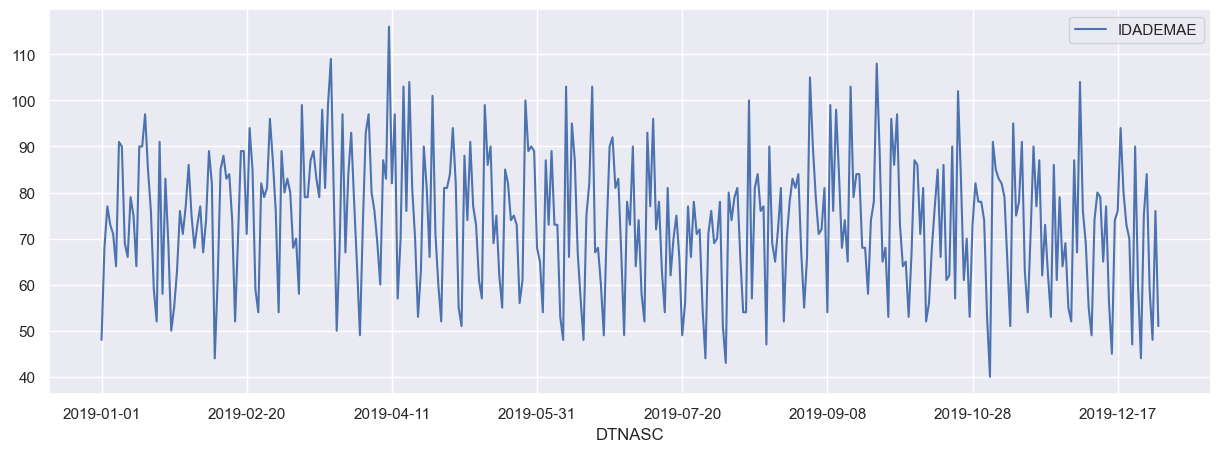

In [33]:
# Gerando um painel dos valores obtidos
# Quantidade de crianças nascidas ao longo de 2019

df2.pivot_table(
    index='DTNASC',
    values='IDADEMAE',
    aggfunc='count',
).plot(figsize=[15,5])

<Axes: xlabel='DTNASC'>

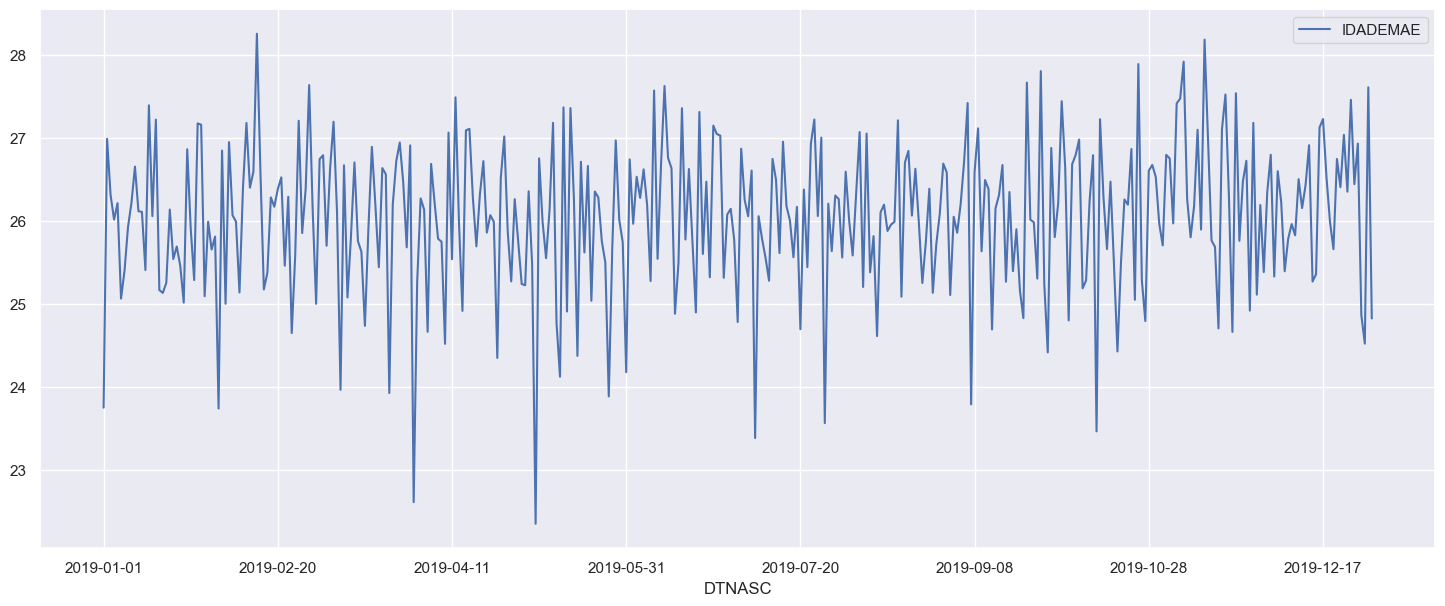

In [34]:
# Gerando agora um painel para a idade média da mãe ao longo do tempo
df2.pivot_table(
    index='DTNASC',
    values='IDADEMAE',
    aggfunc='mean'
).plot(figsize=[18,7])

<Axes: xlabel='DTNASC'>

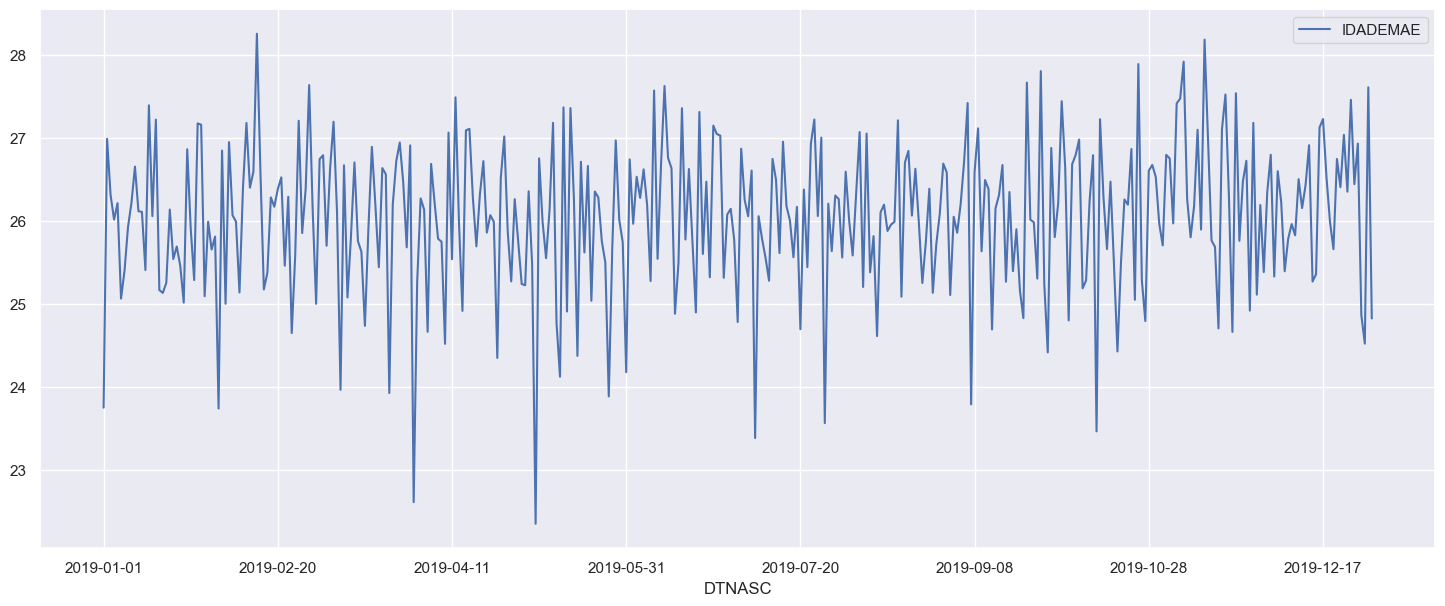

In [35]:
# Outra forma
pd.pivot_table(
    data=df2,
    index='DTNASC',
    values='IDADEMAE',
    aggfunc='mean'
).plot(figsize=[18,7])

## 2 - Exemplos base real <a name='Ex.RealBase'><a/>

<div style="text-align: right"  
    
[Voltar ao sumário](#contents)

In [37]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

In [38]:
# Carregando o DataFrame SINASC

df_raw = pd.read_csv('SINASC_RO_2019.csv')
print(df_raw.shape)
df_raw.head(3)

(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [39]:
# Definindo um dataframe selecionado

df1 = df_raw[['ESCMAE', 'IDADEMAE']]
df1.head()

,ESCMAE,IDADEMAE
0,8 a 11 anos,19
1,8 a 11 anos,29
2,8 a 11 anos,37
3,12 anos ou mais,30
4,8 a 11 anos,30


In [40]:
# Retorno do pandas object
df1.groupby('ESCMAE')

In [41]:
# Contagem retornando um dataframe

df1.groupby('ESCMAE').count()

,IDADEMAE
ESCMAE,
1 a 3 anos,516
12 anos ou mais,5767
4 a 7 anos,4760
8 a 11 anos,15633
Nenhuma,40


In [42]:
# Contagem retornando uma series

df1.groupby('ESCMAE')['IDADEMAE'].count()

ESCMAE
1 a 3 anos           516
12 anos ou mais     5767
4 a 7 anos          4760
8 a 11 anos        15633
Nenhuma               40
Name: IDADEMAE, dtype: int64

In [43]:
# O to_frame() converte para um dataframe

df1.groupby('ESCMAE')['IDADEMAE'].count().to_frame()

,IDADEMAE
ESCMAE,
1 a 3 anos,516
12 anos ou mais,5767
4 a 7 anos,4760
8 a 11 anos,15633
Nenhuma,40


In [44]:
# Definindo uma variável 

esc_mae = df1.groupby('ESCMAE')

In [45]:
type(esc_mae)

pandas.core.groupby.generic.DataFrameGroupBy

In [46]:
# Verificando a média

esc_mae.mean()

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [47]:
# Contagem 

esc_mae.count()

,IDADEMAE
ESCMAE,
1 a 3 anos,516
12 anos ou mais,5767
4 a 7 anos,4760
8 a 11 anos,15633
Nenhuma,40


In [48]:
# Soma da idade pelas faixas de ESCMAE

esc_mae.sum()

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263


## Anos de estudo da mãe "ESCMAE" x idade mediana da mãe "IDADEMAE" x idade mediana do pai "IDADEPAI"

In [50]:
# Criando o dataframe referente às variáveis de interesse

df2 = df_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI']]
df2.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [51]:
df2.shape

(27028, 3)

In [52]:
# Quantos bebês tem a idade da mãe não registrada?

df2.IDADEMAE.isna().sum()

0

In [53]:
# Quantos bebês tem a idade do pai não registrada?

df2.IDADEPAI.isna().sum()

19421

In [54]:
# Proporção de linhas que não contem a idade do pai

prop = df2.IDADEPAI.isna().sum() / df2.shape[0]
print('Em {}% a idade do pai não foi registrada.'.format(prop*100))

Em 71.85511321592422% a idade do pai não foi registrada.


In [55]:
# Removendo as linhas em que não há a idade do pai

print(df2.dropna().shape)

# Obtendo a mediana

result = df2.dropna().groupby('ESCMAE').median()
result

(7543, 3)


,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,29.0,34.0
12 anos ou mais,30.0,32.0
4 a 7 anos,26.0,30.0
8 a 11 anos,25.0,29.0
Nenhuma,31.5,38.5


In [56]:
# Determinando a diferença entre a idade do pai e da mãe

result['dif'] = result['IDADEPAI'] - result['IDADEMAE']
result

,IDADEMAE,IDADEPAI,dif
ESCMAE,,,
1 a 3 anos,29.0,34.0,5.0
12 anos ou mais,30.0,32.0,2.0
4 a 7 anos,26.0,30.0,4.0
8 a 11 anos,25.0,29.0,4.0
Nenhuma,31.5,38.5,7.0


In [57]:
# Ordenando em função de 'dif'

result.sort_values('dif')

,IDADEMAE,IDADEPAI,dif
ESCMAE,,,
12 anos ou mais,30.0,32.0,2.0
4 a 7 anos,26.0,30.0,4.0
8 a 11 anos,25.0,29.0,4.0
1 a 3 anos,29.0,34.0,5.0
Nenhuma,31.5,38.5,7.0


> Interessante notar como a escolaridade da mãe parece afetar a diferença entre as idades.

# 2.1 - Agregações <a name='aggregations'><a/>

<div style='text-align: right'

[Voltar ao sumário](#contents)

- Métodos otimizados do Pandas dentro do groupby:
 
| Método       | Descrição                               |
|--------------|-----------------------------------------|
| **count()**  | contagem de não *missing*               |
| **sum()**    | soma                                    |
| **mean()**   | média                                   |
| **median()** | mediana                                 |
| **std()**    | desvio padrão amostral                  |
| **var()**    | variancia amostral                      | 
| **min()**    | mínimo                                  |
| **max()**    | máximo                                  |
| **prod()**   | produto                                 |
| **first()**  | primeiro elemento                       |
| **last()**   | último elemento                         |

Além destes, diversos outros métodos do objeto agrupado também funcionam, por exemplo a função ```quantile()```.

In [61]:
# Gerando um novo DataFrame

df = df_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI'
]].copy()

In [62]:
df.head(3)

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0


In [63]:
# Quantidade de bebês por sexo

df.SEXO.value_counts()

SEXO
Masculino    13886
Feminino     13138
Name: count, dtype: int64

In [64]:
df.DTNASC.nunique()

# O resultado é equivalente ao número de dias de 2019

365

In [65]:
df.DTNASC.value_counts()

DTNASC
2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-12-25     44
2019-02-09     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: count, Length: 365, dtype: int64

# 2.2 - GroupBy DTNASC e contagem da IDADEMAE <a nome='GBDataIdade'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

## Em Python

In [68]:
df.groupby('DTNASC')['IDADEMAE'].count()

# Retornando os valores ordenados

DTNASC
2019-01-01    48
2019-01-02    68
2019-01-03    77
2019-01-04    73
2019-01-05    71
              ..
2019-12-27    84
2019-12-28    59
2019-12-29    48
2019-12-30    76
2019-12-31    51
Name: IDADEMAE, Length: 365, dtype: int64

In [69]:
# Ordenando do maior para o menor

df.groupby('DTNASC')['IDADEMAE'].count().sort_values(ascending=False)
# ascending=False --> ordem decrescente

DTNASC
2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-07-28     44
2019-12-25     44
2019-02-09     44
2019-08-04     43
2019-11-03     40
Name: IDADEMAE, Length: 365, dtype: int64

## Em SQL


``` sql
SELECT DTNASC, count(IDADEMAE) as contagem
FROM df
GROUP BY DTNASC
ORDER BY contagem DESC
```

# 2.2 - GroupBy DTNASC e média da IDADEMAE <a nome='GBDataMediaIdade'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

## Em SQL
``` sql
SELECT DTNASC, AVG(IDADEMAE)
FROM df
GROUP BY DTNASC
```

## Em Python

In [74]:
# Média de idade da mãe em cada dia

df.groupby('DTNASC')['IDADEMAE'].mean()

DTNASC
2019-01-01    23.750000
2019-01-02    26.985294
2019-01-03    26.311688
2019-01-04    26.013699
2019-01-05    26.211268
                ...    
2019-12-27    26.928571
2019-12-28    24.864407
2019-12-29    24.520833
2019-12-30    27.605263
2019-12-31    24.823529
Name: IDADEMAE, Length: 365, dtype: float64

In [75]:
# Removendo a ordenação

df.groupby('DTNASC', sort=False)['IDADEMAE'].mean()

DTNASC
2019-02-19    26.168539
2019-02-21    26.521277
2019-02-25    25.585366
2019-03-20    26.191919
2019-03-23    26.560000
                ...    
2019-12-31    24.823529
2019-12-15    25.355556
2019-12-21    26.742857
2019-12-22    26.404255
2019-12-28    24.864407
Name: IDADEMAE, Length: 365, dtype: float64

In [76]:
# Definindo na ordem decrescente

df.groupby('DTNASC')['IDADEMAE'].mean().sort_values(ascending=False)

DTNASC
2019-02-14    28.250000
2019-11-13    28.179487
2019-11-07    27.914634
2019-10-25    27.885246
2019-09-27    27.800000
                ...    
2019-07-27    23.563636
2019-10-13    23.464286
2019-07-07    23.384615
2019-03-31    22.612245
2019-05-05    22.352941
Name: IDADEMAE, Length: 365, dtype: float64

## Somando IDADEMAE


In [78]:
df.groupby('DTNASC')['IDADEMAE'].sum()

DTNASC
2019-01-01    1140
2019-01-02    1835
2019-01-03    2026
2019-01-04    1899
2019-01-05    1861
              ... 
2019-12-27    2262
2019-12-28    1467
2019-12-29    1177
2019-12-30    2098
2019-12-31    1266
Name: IDADEMAE, Length: 365, dtype: int64

## Plotando idade média ao longo do tempo

In [80]:
resultado = df.groupby('DTNASC')['IDADEMAE'].mean()

In [81]:
resultado

DTNASC
2019-01-01    23.750000
2019-01-02    26.985294
2019-01-03    26.311688
2019-01-04    26.013699
2019-01-05    26.211268
                ...    
2019-12-27    26.928571
2019-12-28    24.864407
2019-12-29    24.520833
2019-12-30    27.605263
2019-12-31    24.823529
Name: IDADEMAE, Length: 365, dtype: float64

Text(0, 0.5, 'Média idade mãe')

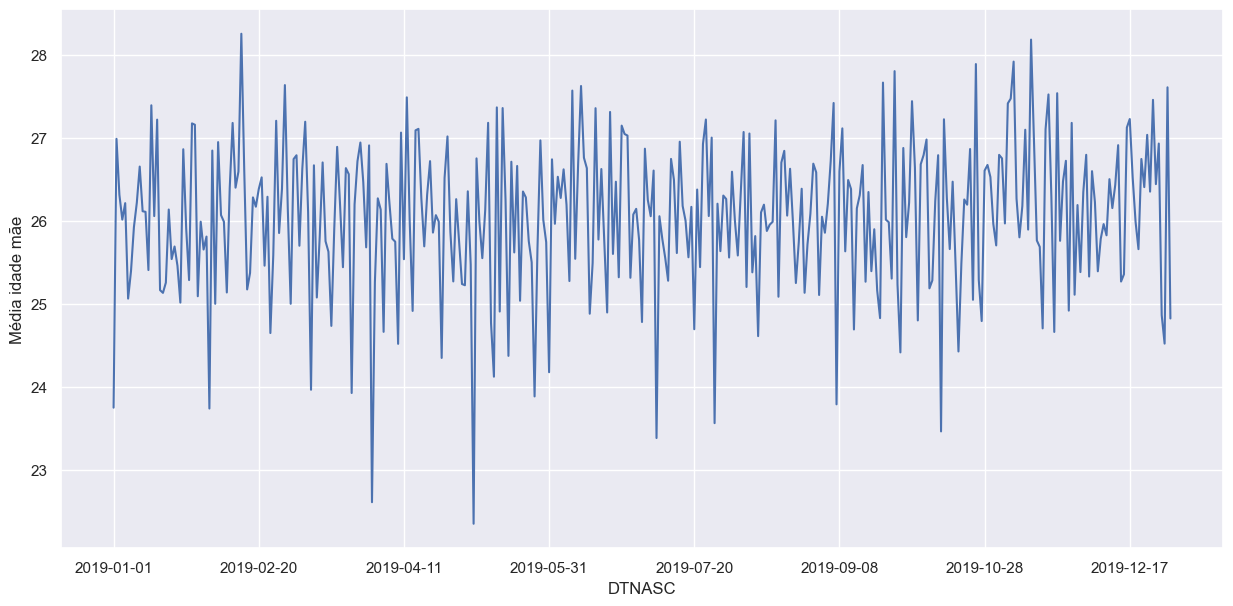

In [82]:
resultado.plot(figsize=[15,7])
plt.ylabel('Média idade mãe')

# 2.3 - Outros exemplos <a name='Ex'><a/>

<div style='text-align: right'

[Voltar ao sumário](#contents)

## Quantidade de bebês ao longo do ano

In [85]:
resultado = df.groupby('DTNASC')['IDADEMAE'].count()

# .count() para realizar a contagem de nascimentos por data

Text(0, 0.5, 'quantidade de nascimentos')

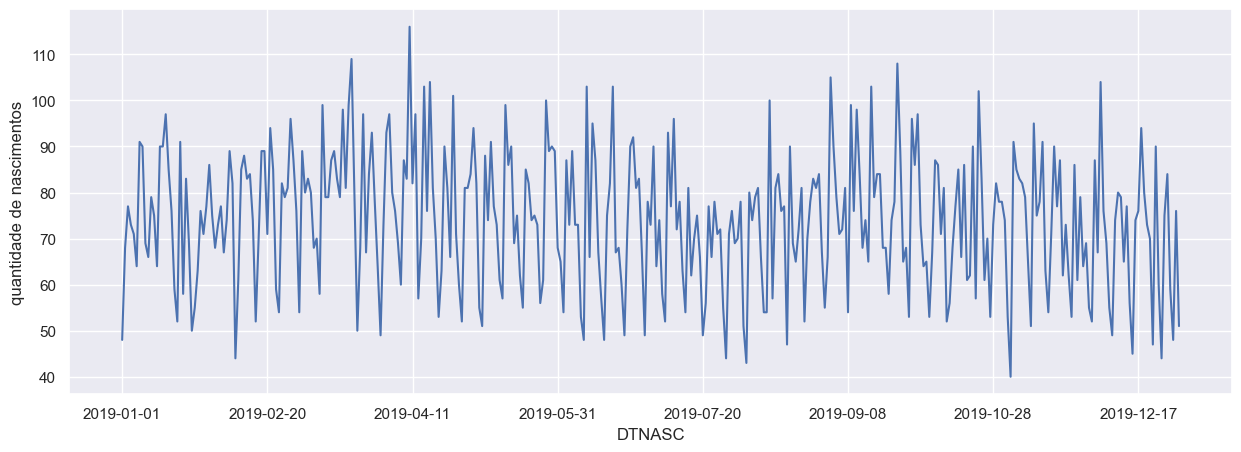

In [86]:
resultado.plot(figsize=[15,5])
plt.ylabel('quantidade de nascimentos')

## Quantidade de bebês do sexo feminino e masculino ao longo do ano

In [88]:
df['SEXO'].value_counts()

SEXO
Masculino    13886
Feminino     13138
Name: count, dtype: int64

In [89]:
# Filtrando para bebês femininos
df[df['SEXO'] == 'Feminino'].head(3)

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0


In [90]:
# Quantidade em feminino

fem = df[df['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()
fem.head(2)

DTNASC
2019-01-01    20
2019-01-02    31
Name: IDADEMAE, dtype: int64

In [91]:
# Quantidade em masculino

masc = df[df['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADEMAE'].count()
masc.head(2)

DTNASC
2019-01-01    28
2019-01-02    37
Name: IDADEMAE, dtype: int64

Text(0, 0.5, 'quantidade de nascimentos')

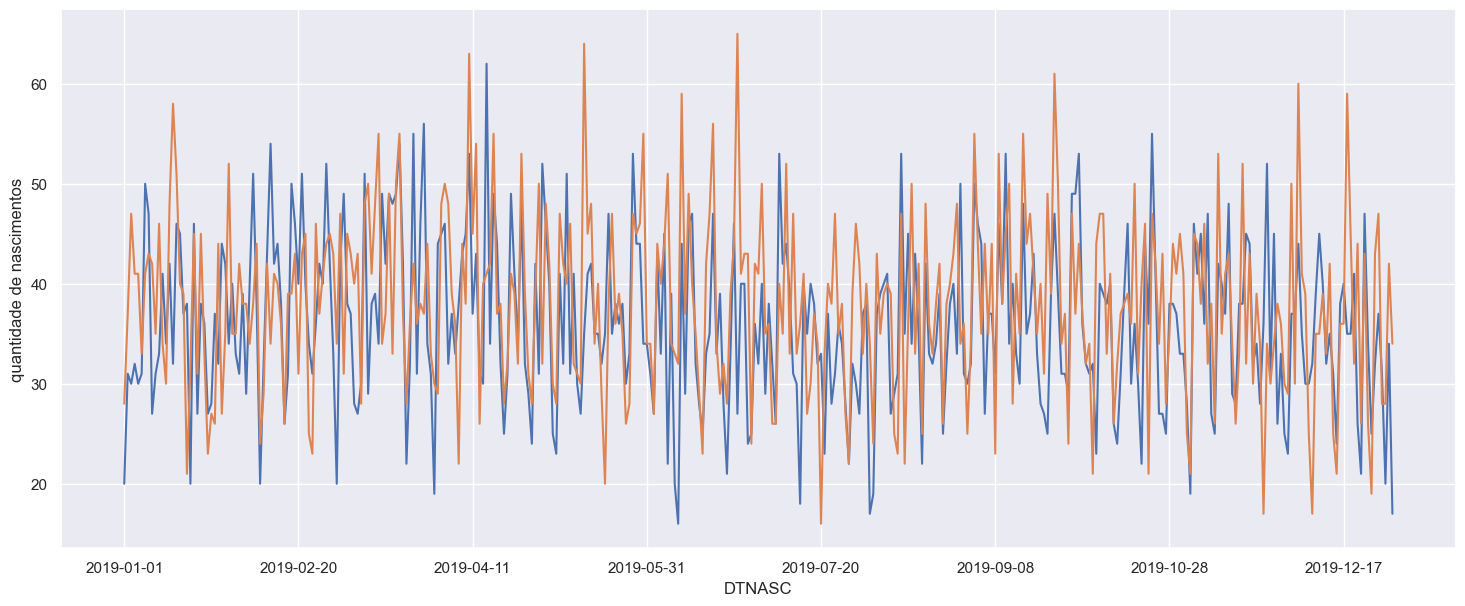

In [92]:
# Plotando um painel com as contagens

fig = plt.figure(figsize=[18,7])
fem.plot()
masc.plot()
plt.ylabel('quantidade de nascimentos')

## Quantidade de bebês do sexo feminino e masculino ao longo do ano usando `unstack`

In [94]:
# Deixando o dataframe em função das variáveis de interesse
df.groupby(['DTNASC', 'SEXO']).count()

IDADEMAE  APGAR1  APGAR5  PESO  CONSULTAS  GESTACAO  \
DTNASC     SEXO                                                             
2019-01-01 Feminino         20      20      20    20         20        19   
           Masculino        28      28      28    28         28        26   
2019-01-02 Feminino         31      30      30    31         31        29   
           Masculino        37      36      36    37         37        36   
2019-01-03 Feminino         30      30      30    30         30        28   
...                        ...     ...     ...   ...        ...       ...   
2019-12-29 Masculino        28      28      28    28         28        27   
2019-12-30 Feminino         34      33      34    34         34        33   
           Masculino        42      42      42    42         42        39   
2019-12-31 Feminino         17      17      17    17         17        15   
           Masculino        34      34      34    34         34        33   

                      GRAVIDEZ  ESCMAE  IDADEPAI  
DTNASC     SEXO                                   
2019-01-01 Feminino         20      20         5  
           Masculino        28      28         7  
2019-01-02 Feminino         31      30         8  
           Masculino        37      36         9  
2019-01-03 Feminino         30      30         8  
...                        ...     ...       ...  
2019-12-29 Masculino        28      28         8  
2019-12-30 Feminino         33      31         9  
           Masculino        42      41        13  
2019-12-31 Feminino         17      17         5  
           Masculino        34      34         6  

[730 rows x 9 columns]

In [95]:
# Obtendo os nascimentos separados por sexo
df.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count()

DTNASC      SEXO     
2019-01-01  Feminino     20
            Masculino    28
2019-01-02  Feminino     31
            Masculino    37
2019-01-03  Feminino     30
                         ..
2019-12-29  Masculino    28
2019-12-30  Feminino     34
            Masculino    42
2019-12-31  Feminino     17
            Masculino    34
Name: IDADEMAE, Length: 730, dtype: int64

In [96]:
# Separando em colunas por meio do unstack (desempilhar)

# Contagem para ambos os sexos

df.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count().unstack()

SEXO,Feminino,Masculino
DTNASC,,
2019-01-01,20,28
2019-01-02,31,37
2019-01-03,30,47
2019-01-04,32,41
2019-01-05,30,41
...,...,...
2019-12-27,37,47
2019-12-28,31,28
2019-12-29,20,28


Text(0, 0.5, 'quantidade de nascimentos')

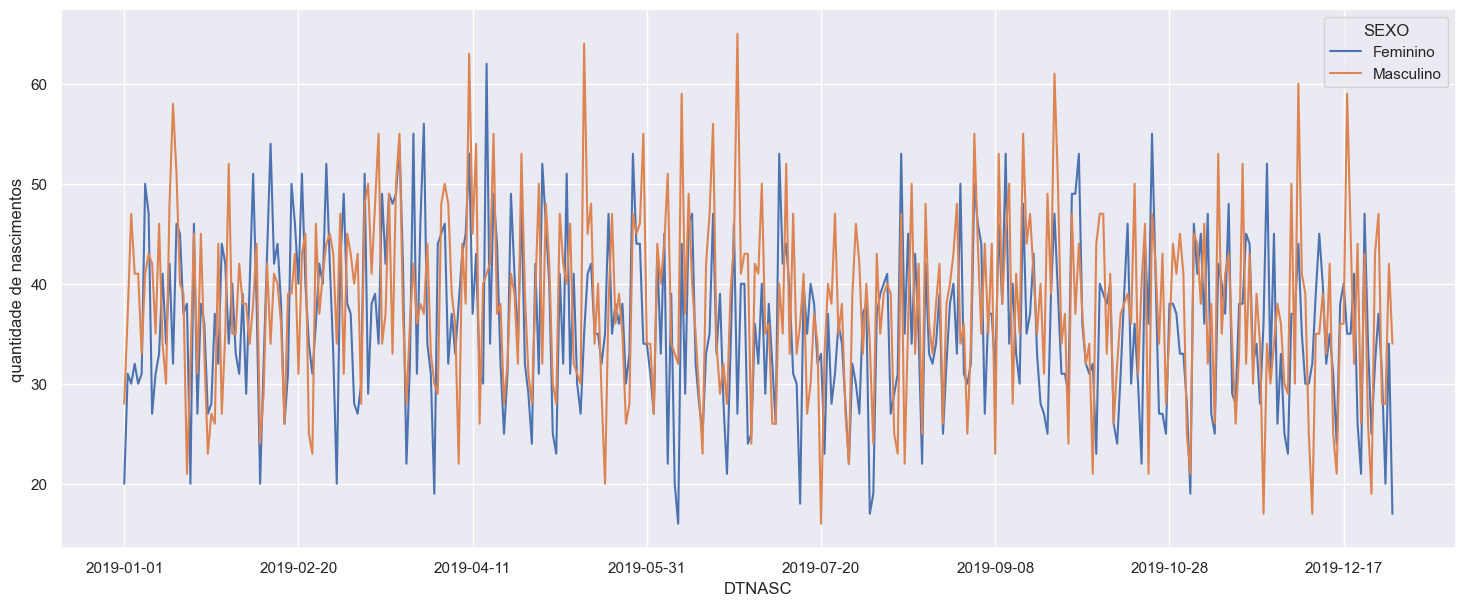

In [97]:
df.groupby(['DTNASC', 'SEXO'])['IDADEMAE'].count().unstack().plot(figsize=[18,7])
plt.ylabel('quantidade de nascimentos')

> Uma metodologia mais interessante e prártica.

## Quantidade de bebês por dia da semana (seg, ter, qua...)

#### Mudando para o índice DTNASC

- Utilizando o método `to_datetime()`

In [101]:
df.dtypes

IDADEMAE       int64
SEXO          object
APGAR1       float64
APGAR5       float64
PESO           int64
CONSULTAS      int64
DTNASC        object
GESTACAO      object
GRAVIDEZ      object
ESCMAE        object
IDADEPAI     float64
dtype: object

In [102]:
# Alterando o formado da coluna para o formato de data

df['DTNASC'] = pd.to_datetime(df['DTNASC'])

In [103]:
df.dtypes

IDADEMAE              int64
SEXO                 object
APGAR1              float64
APGAR5              float64
PESO                  int64
CONSULTAS             int64
DTNASC       datetime64[ns]
GESTACAO             object
GRAVIDEZ             object
ESCMAE               object
IDADEPAI            float64
dtype: object

In [104]:
df.set_index('DTNASC', inplace=True)

#### Criando uma variável para dia da semana de nascimento

- Fazendo uso do método `.dayofweek`

In [106]:
df.index

DatetimeIndex(['2019-02-19', '2019-02-21', '2019-02-25', '2019-03-20',
               '2019-03-23', '2019-03-27', '2019-04-01', '2019-04-01',
               '2019-02-28', '2019-03-11',
               ...
               '2019-10-24', '2019-11-09', '2019-11-09', '2019-11-20',
               '2019-11-21', '2019-12-13', '2019-10-04', '2019-08-02',
               '2019-12-23', '2019-12-27'],
              dtype='datetime64[ns]', name='DTNASC', length=27028, freq=None)

In [107]:
# Convertendo para dias da semana

df.index.dayofweek

# index: monday=0 ... sunday=6

Index([1, 3, 0, 2, 5, 2, 0, 0, 3, 0,
       ...
       3, 5, 5, 2, 3, 4, 4, 4, 0, 4],
      dtype='int32', name='DTNASC', length=27028)

In [108]:
# Gerando uma coluna para o dia da semana

df['DIADASEMANA'] = df.index.dayofweek

In [109]:
df.head(3)

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI,DIADASEMANA
DTNASC,,,,,,,,,,,
2019-02-19,19,Masculino,9.0,10.0,3685,4,37 a 41 semanas,Única,8 a 11 anos,26.0,1
2019-02-21,29,Feminino,8.0,9.0,3055,4,37 a 41 semanas,Única,8 a 11 anos,24.0,3
2019-02-25,37,Feminino,8.0,10.0,3460,4,37 a 41 semanas,Única,8 a 11 anos,32.0,0


In [110]:
df['DIADASEMANA'].value_counts()

DIADASEMANA
0    4493
2    4413
3    4138
1    4024
4    3855
5    3183
6    2922
Name: count, dtype: int64

In [111]:
# ou

df.groupby('DIADASEMANA')['IDADEMAE'].count()

DIADASEMANA
0    4493
1    4024
2    4413
3    4138
4    3855
5    3183
6    2922
Name: IDADEMAE, dtype: int64

In [112]:
# Gerando um gráfico

result = df.groupby('DIADASEMANA')['IDADEMAE'].count()
print(result.index)

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='DIADASEMANA')


Text(0, 0.5, 'quantidade de nascimentos')

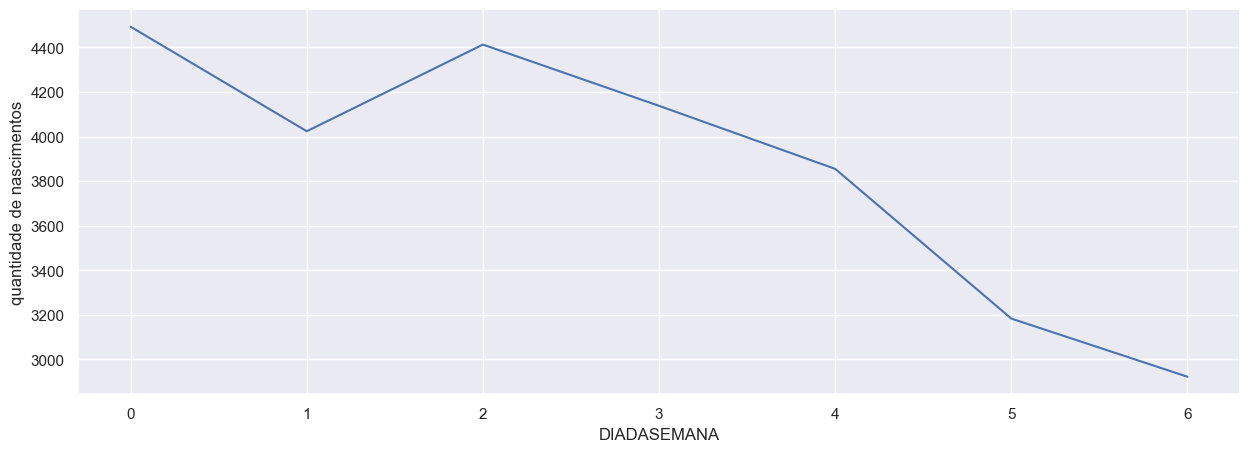

In [113]:
fig = plt.figure(figsize=[15,5])
result.plot()
plt.ylabel('quantidade de nascimentos')

Text(0, 0.5, 'quantidade de nascimentos')

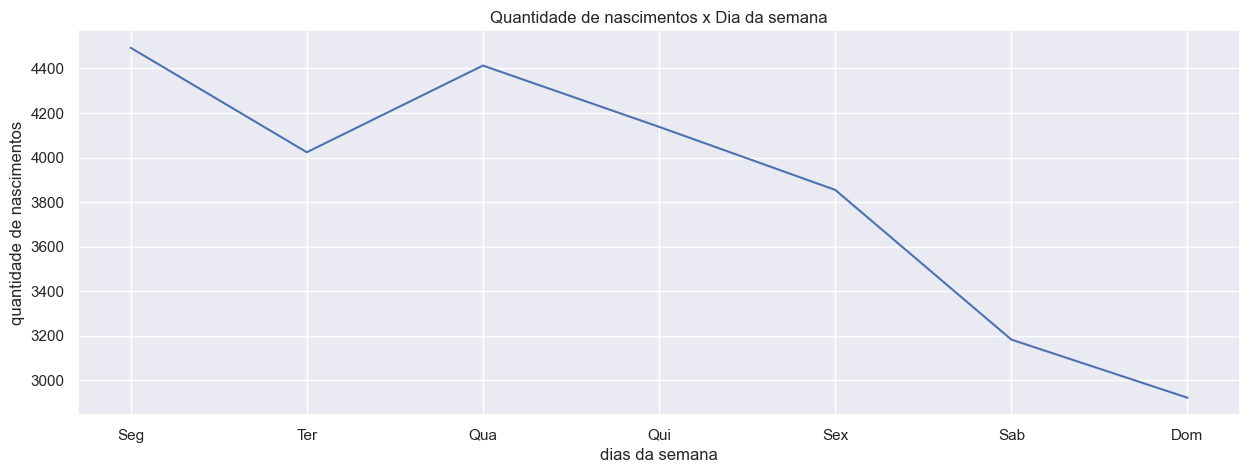

In [114]:
# Renomeando os índices de dias da semana

fig, ax = plt.subplots(figsize=[15,5])
result.plot()

# Ajustando os índices
ax.set_xticks(result.index)
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.title('Quantidade de nascimentos x Dia da semana')
plt.xlabel('dias da semana')
plt.ylabel('quantidade de nascimentos')

## Média de peso dos bebês masculinos e femininos ao longo do tempo

In [116]:
df.groupby(['DTNASC', 'SEXO'])['PESO'].mean()

DTNASC      SEXO     
2019-01-01  Feminino     3280.000000
            Masculino    3093.392857
2019-01-02  Feminino     3219.225806
            Masculino    3347.027027
2019-01-03  Feminino     3254.066667
                            ...     
2019-12-29  Masculino    3121.035714
2019-12-30  Feminino     3217.441176
            Masculino    3305.214286
2019-12-31  Feminino     3223.941176
            Masculino    3381.382353
Name: PESO, Length: 730, dtype: float64

In [117]:
df.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
DTNASC,,
2019-01-01,3280.000000,3093.392857
2019-01-02,3219.225806,3347.027027
2019-01-03,3254.066667,3231.042553
2019-01-04,3096.250000,3335.682927
2019-01-05,3288.366667,3223.902439
...,...,...
2019-12-27,3299.594595,3218.617021
2019-12-28,3204.354839,3294.928571
2019-12-29,3251.000000,3121.035714


<Axes: xlabel='DTNASC'>

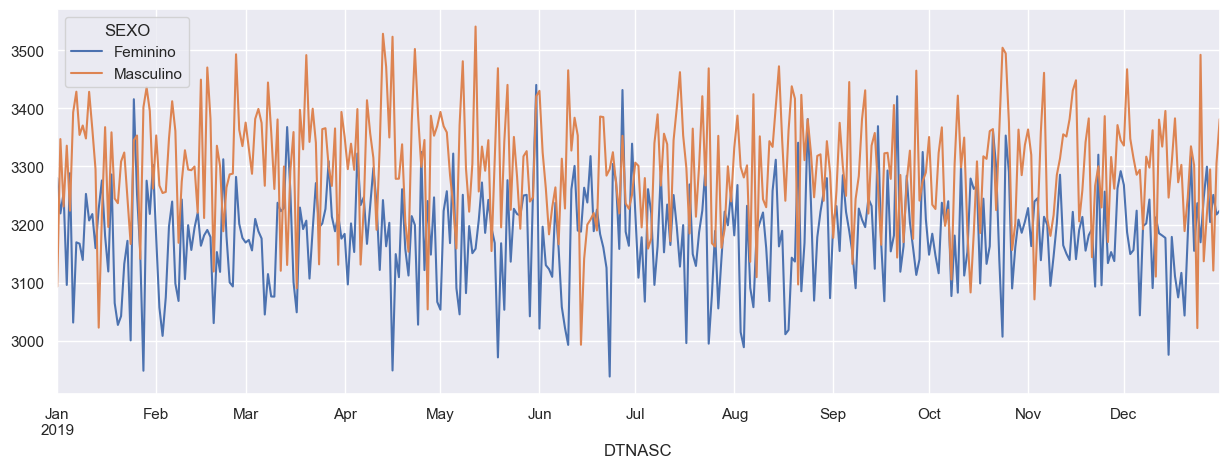

In [118]:
df.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5])

> Bebês do sexo masculino tendem a ser mais pesados.

## Peso do bebê x Anos de estudo da mãe 

In [121]:
df.groupby('ESCMAE')['PESO'].median()

ESCMAE
1 a 3 anos         3227.5
12 anos ou mais    3275.0
4 a 7 anos         3265.0
8 a 11 anos        3275.0
Nenhuma            3120.0
Name: PESO, dtype: float64

<Axes: xlabel='ESCMAE'>

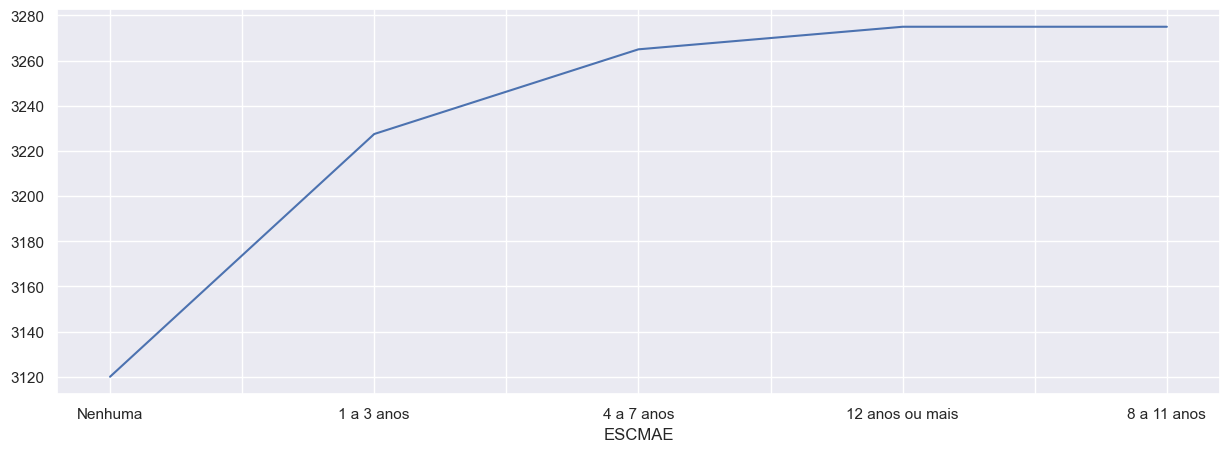

In [122]:
df.groupby('ESCMAE')['PESO'].median().sort_values().plot(figsize=[15,5])

> De fato parece haver uma correlação entre o tempo de estudos da mãe e o peso do bebê.

## Gestação x Escala Apgar

In [126]:
df.groupby('GESTACAO')['APGAR1'].mean()

GESTACAO
22 a 27 semanas        5.369048
28 a 31 semanas        6.604938
32 a 36 semanas        7.820949
37 a 41 semanas        8.191114
42 semanas e mais      8.120516
Menos de 22 semanas    5.857143
Name: APGAR1, dtype: float64

Text(0.5, 0, 'gestacao')

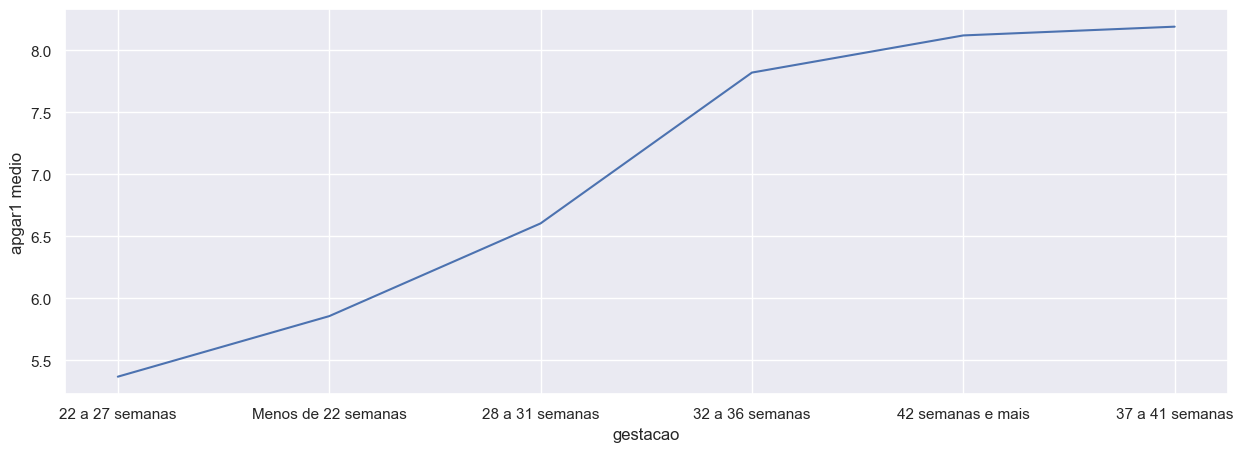

In [127]:
df.groupby('GESTACAO')['APGAR1'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('apgar1 medio')
plt.xlabel('gestacao')

In [128]:
# Analisando o apgar5
df.groupby('GESTACAO')['APGAR5'].mean()

GESTACAO
22 a 27 semanas        6.623529
28 a 31 semanas        7.987654
32 a 36 semanas        8.908684
37 a 41 semanas        9.224437
42 semanas e mais      9.219198
Menos de 22 semanas    6.571429
Name: APGAR5, dtype: float64

Text(0.5, 0, 'gestacao')

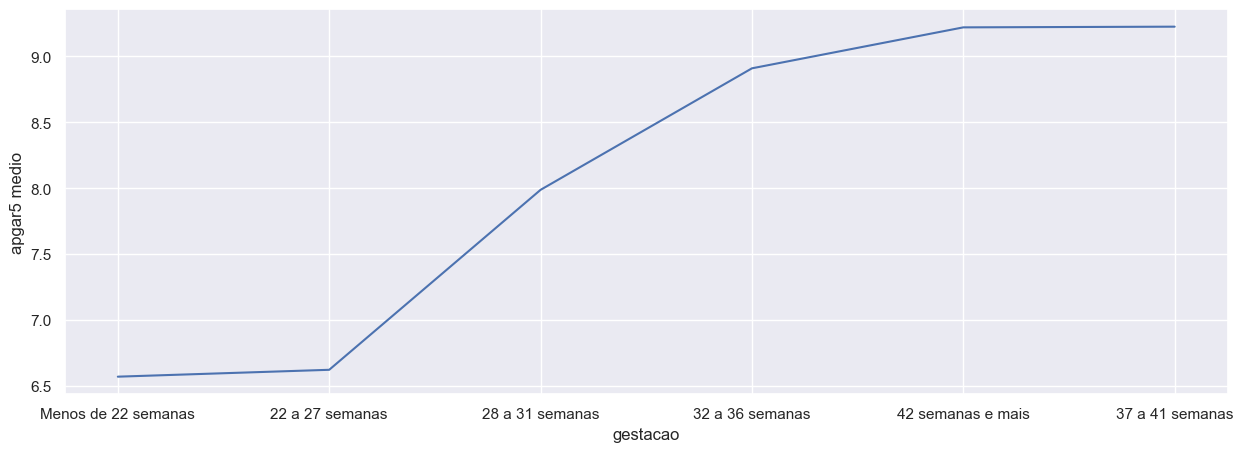

In [129]:
df.groupby('GESTACAO')['APGAR5'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('apgar5 medio')
plt.xlabel('gestacao')

# 3 - Método aggregate <a name='aggregate'><a/>

<div style='text-align:right'
    
[Voltar ao sumário](#contents)

In [131]:
# Importando bibliotecas 

import pandas as pd
import numpy as np

In [132]:
# Carregando a base de daddos

df_raw = pd.read_csv('SINASC_RO_2019.csv')
df_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [133]:
df_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [134]:
# Definindo um dataframe com as colunas ESCMAR e IDADEMAE

df1 = df_raw[['ESCMAE', 'IDADEMAE']]
df1.head(3)

,ESCMAE,IDADEMAE
0,8 a 11 anos,19
1,8 a 11 anos,29
2,8 a 11 anos,37


In [135]:
# Definindo um segundo dataframe

df2 = df_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI']]
df2.head(3)

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0


> Os dataframes serão utilizados para compreender o método `aggregate`.

## Método `aggregate()`  ou `agg()`

In [138]:
# Utilizando o groupby

df2.groupby('ESCMAE').max()

# Note como o método .max() é utilizado

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,45,60.0
12 anos ou mais,51,65.0
4 a 7 anos,47,86.0
8 a 11 anos,53,70.0
Nenhuma,52,52.0


In [139]:
# Por meio do aggregate

df2.groupby('ESCMAE').aggregate('max')

# max dentro do aggregate (como argumento) e como uma string

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,45,60.0
12 anos ou mais,51,65.0
4 a 7 anos,47,86.0
8 a 11 anos,53,70.0
Nenhuma,52,52.0


In [140]:
# Chamada simplificada para o mesmo método

df2.groupby('ESCMAE').agg('max')

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,45,60.0
12 anos ou mais,51,65.0
4 a 7 anos,47,86.0
8 a 11 anos,53,70.0
Nenhuma,52,52.0


> O aggregate possui a vantagem de permitir a utilização de mais funções como parâmetros (argumentos).

## Agregações  

O pandas tem alguns métodos otimizados dentro do groupby: 

| Método       | Descrição                               |
|--------------|-----------------------------------------|
| **count()**  | contagem de não *missing*               |
| **sum()**    | soma                                    |
| **mean()**   | média                                   |
| **median()** | mediana                                 |
| **std()**    | desvio padrão amostral                  |
| **var()**    | variancia amostral                      | 
| **min()**    | mínimo                                  |
| **max()**    | máximo                                  |
| **prod()**   | produto                                 |
| **first()**  | primeiro elemento                       |
| **last()**   | último elemento                         |

Além destes, diversos outros métodos do objeto agrupado também funcionam, por exemplo a função ```quantile()```.

In [143]:
# Pode-se para os métodos como função 
# Compondo uma lista dentro do aggregate

df2.groupby('ESCMAE').aggregate(['min', 'median', 'max'])

IDADEMAE            IDADEPAI             
                     min median max      min median   max
ESCMAE                                                   
1 a 3 anos            12   28.0  45     17.0   34.0  60.0
12 anos ou mais       16   29.0  51     17.0   32.0  65.0
4 a 7 anos            11   24.0  47     16.0   30.0  86.0
8 a 11 anos           12   24.0  53     15.0   29.0  70.0
Nenhuma               14   33.0  52     29.0   38.5  52.0

In [144]:
# Atribuindo as funções isoladamente para cada variável como um dicionário

df2.groupby('ESCMAE').aggregate({'IDADEMAE':'min', 'IDADEPAI':'max'})

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,12,60.0
12 anos ou mais,16,65.0
4 a 7 anos,11,86.0
8 a 11 anos,12,70.0
Nenhuma,14,52.0


#### Usando funções próprias

Também é possível passar funções próprias através do método `aggregate()` ou `agg()`.

In [146]:
def amplitude(array):
    return array.max() - array.min()

amplitude(df2['IDADEMAE'])

42

In [147]:
df2.groupby('ESCMAE').agg(amplitude)

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,33,43.0
12 anos ou mais,35,48.0
4 a 7 anos,36,70.0
8 a 11 anos,41,55.0
Nenhuma,38,23.0


##### Usando várias funções

Como no método `describe()`, pode-se aplicar várias funções ao agrupamento. Buscando assim um detalhamentos ou descrição dos dados de forma objetiva e almejada.

In [149]:
agrupamento = df2.groupby('ESCMAE')
agrupamento.agg(['mean', 'std', amplitude])

IDADEMAE                       IDADEPAI                    
                      mean       std amplitude       mean       std amplitude
ESCMAE                                                                       
1 a 3 anos       28.430233  7.376226        33  33.805556  9.235020      43.0
12 anos ou mais  29.548119  5.365522        35  32.956214  6.919853      48.0
4 a 7 anos       24.604412  6.812225        36  31.142111  8.717118      70.0
8 a 11 anos      25.150387  6.049985        41  30.028020  7.741795      55.0
Nenhuma          31.575000  8.619856        38  38.500000  8.549854      23.0

In [150]:
# Pode-se renomear as colunas por meio de tuplas

agrupamento = df2.groupby('ESCMAE')
agrupamento.agg([ ('média', 'mean'), ('desvio padrão', 'std'), ('amplitude', amplitude) ])

# --> ("nome da coluna", "respectivo método") 

IDADEMAE                           IDADEPAI                \
                     média desvio padrão amplitude      média desvio padrão   
ESCMAE                                                                        
1 a 3 anos       28.430233      7.376226        33  33.805556      9.235020   
12 anos ou mais  29.548119      5.365522        35  32.956214      6.919853   
4 a 7 anos       24.604412      6.812225        36  31.142111      8.717118   
8 a 11 anos      25.150387      6.049985        41  30.028020      7.741795   
Nenhuma          31.575000      8.619856        38  38.500000      8.549854   

                           
                amplitude  
ESCMAE                     
1 a 3 anos           43.0  
12 anos ou mais      48.0  
4 a 7 anos           70.0  
8 a 11 anos          55.0  
Nenhuma              23.0

##### Em uma forma bem genérica, pode-se também utilizar dicionário para especificar conjuntos de funções para cada variável

In [152]:
agrupamento.agg({'IDADEMAE': ['min', 'max'], 'IDADEPAI': 'sum'})

IDADEMAE      IDADEPAI
                     min max       sum
ESCMAE                                
1 a 3 anos            12  45    2434.0
12 anos ou mais       16  51   74514.0
4 a 7 anos            11  47   29803.0
8 a 11 anos           12  53  127529.0
Nenhuma               14  52     231.0

##### Usando dentro das chaves listas com tuplas, pode-se especificar os nomes das funções

In [154]:
agrupamento.agg({
    'IDADEMAE': [('mínino','min'), ('máximo', 'max')], 
    'IDADEPAI': [('soma', 'sum')]
})

IDADEMAE         IDADEPAI
                  mínino máximo      soma
ESCMAE                                   
1 a 3 anos            12     45    2434.0
12 anos ou mais       16     51   74514.0
4 a 7 anos            11     47   29803.0
8 a 11 anos           12     53  127529.0
Nenhuma               14     52     231.0

# 4 - Método apply do groupby <a name='applyGroupby'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

In [156]:
# Bibliotecas

import numpy as np
import pandas as pd

In [157]:
# Carregando o banco de dados

df_raw = pd.read_csv('SINASC_RO_2019.csv')
df_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [158]:
# Selecionando algumas colunas 

df = df_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT']]
df.head()

,ESCMAE,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
0,8 a 11 anos,19,26.0,0.0,0.0
1,8 a 11 anos,29,24.0,1.0,0.0
2,8 a 11 anos,37,32.0,2.0,0.0
3,12 anos ou mais,30,24.0,0.0,0.0
4,8 a 11 anos,30,27.0,1.0,0.0


# Método `apply()`

No exemplo abaixo, vamos usar o "dividir aplicar combinar" para obter as 5 linhas com mais alto valor de uma variável no `dataframe`.

In [160]:
# Definindo uma função que retorna as n linhas de valor mais alto da variável coluna

def top(df, n=5, column = 'QTDFILVIVO'): #O dataframe será ordenado pelo col QTDFILVIVO
    return df.fillna(0).sort_values(by=column, ascending=False)[:n]

In [161]:
df.head()

,ESCMAE,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
0,8 a 11 anos,19,26.0,0.0,0.0
1,8 a 11 anos,29,24.0,1.0,0.0
2,8 a 11 anos,37,32.0,2.0,0.0
3,12 anos ou mais,30,24.0,0.0,0.0
4,8 a 11 anos,30,27.0,1.0,0.0


In [162]:
# Top 5 maiores valores com relação a coluna QTDFILVIVO
top(df)

,ESCMAE,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
11365,4 a 7 anos,24,25.0,30.0,0.0
16018,8 a 11 anos,39,43.0,14.0,0.0
6831,Nenhuma,42,0.0,12.0,0.0
1854,Nenhuma,40,43.0,12.0,0.0
22442,1 a 3 anos,44,0.0,12.0,1.0


In [163]:
# Modificando a coluna de referência 

top(df, column = 'QTDFILMORT')

#Ordenando agora por QTDFILMORT

,ESCMAE,IDADEMAE,IDADEPAI,QTDFILVIVO,QTDFILMORT
25709,12 anos ou mais,26,0.0,1.0,28.0
20299,Nenhuma,40,0.0,8.0,9.0
4762,8 a 11 anos,36,39.0,0.0,9.0
7904,4 a 7 anos,27,0.0,4.0,8.0
2888,8 a 11 anos,24,0.0,1.0,7.0


In [164]:
# Aplicando por faixa de tempo de estudo da mãe

# Aplicando a função definida

df.groupby('ESCMAE').apply(top, include_groups=False)

# Top 5 valores para faixa de escolaridade da mãe

IDADEMAE  IDADEPAI  QTDFILVIVO  QTDFILMORT
ESCMAE                                                           
1 a 3 anos      22442        44       0.0        12.0         1.0
                18476        37       0.0        10.0         0.0
                13220        38       0.0         8.0         0.0
                25867        43       0.0         8.0         1.0
                21736        29       0.0         8.0         0.0
12 anos ou mais 1704         34      40.0         7.0         0.0
                22420        42       0.0         7.0         0.0
                21814        33       0.0         5.0         1.0
                9328         38      60.0         5.0         1.0
                15109        37      39.0         5.0         0.0
4 a 7 anos      11365        24      25.0        30.0         0.0
                12892        34       0.0        10.0         4.0
                16362        39       0.0        10.0         0.0
                13519        41       0.0         9.0         6.0
                12776        34       0.0         9.0         1.0
8 a 11 anos     16018        39      43.0        14.0         0.0
                2793         42       0.0        11.0         0.0
                16596        41       0.0        10.0         0.0
                25358        35       0.0        10.0         2.0
                2575         38       0.0         9.0         0.0
Nenhuma         6831         42       0.0        12.0         0.0
                1854         40      43.0        12.0         0.0
                22061        42       0.0        10.0         0.0
                20299        40       0.0         8.0         9.0
                25091        41       0.0         8.0         0.0

In [165]:
# Modificando a coluna de referência e o número de linhas (top 6 linhas, agora)

df.groupby('ESCMAE').apply(top, n=6, column = 'QTDFILMORT', include_groups=False)


IDADEMAE  IDADEPAI  QTDFILVIVO  QTDFILMORT
ESCMAE                                                           
1 a 3 anos      15000        28       0.0         4.0         4.0
                247          30       0.0         3.0         4.0
                24052        35       0.0         5.0         3.0
                24913        34       0.0         4.0         3.0
                13311        21       0.0         2.0         3.0
                610          18       0.0         2.0         3.0
12 anos ou mais 25709        26       0.0         1.0        28.0
                21579        35       0.0         0.0         6.0
                1231         37       0.0         2.0         6.0
                22619        40       0.0         3.0         6.0
                6336         33       0.0         3.0         6.0
                24580        36      39.0         3.0         4.0
4 a 7 anos      7904         27       0.0         4.0         8.0
                13519        41       0.0         9.0         6.0
                20889        24       0.0         1.0         6.0
                15578        30      39.0         1.0         5.0
                23351        37       0.0         5.0         5.0
                20464        25       0.0         1.0         5.0
8 a 11 anos     4762         36      39.0         0.0         9.0
                2888         24       0.0         1.0         7.0
                20258        41      38.0         2.0         6.0
                2671         32       0.0         4.0         5.0
                8649         39       0.0         1.0         5.0
                21817        34       0.0         2.0         5.0
Nenhuma         20299        40       0.0         8.0         9.0
                26089        27      29.0         4.0         2.0
                16991        41       0.0         0.0         2.0
                17841        28      30.0         5.0         2.0
                15018        36       0.0         5.0         1.0
                2789         40       0.0         6.0         1.0

# Mapping <a name='mapping'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

- Mapping interno ao groupby

In [168]:
# Definindo um DataFrame

df = df_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI']]

In [169]:
df.groupby('ESCMAE').sum()

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,14670,2434.0
12 anos ou mais,170404,74514.0
4 a 7 anos,117117,29803.0
8 a 11 anos,393176,127529.0
Nenhuma,1263,231.0


Caso seja de interesse criar novas faixar (de idade)
- 1 a 3 anos e 4 a 7 anos = 1 a 7 anos
- 8 a 11 anos e 12 anos ou mais = 8 ou mais

In [171]:
# Primeiramente é importar definir como índice a 
# coluna que se deseja mapear

df1 = df.set_index('ESCMAE')

# Definindo o mapping
mapping = {
    'Nenhuma': 'Nenhuma',
    '1 a 3 anos': '1 a 7 anos',
    '4 a 7 anos': '1 a 7 anos',
    '8 a 11 anos': '8 ou mais',
    '12 anos ou mais': '8 ou mais'
    
}

In [172]:
# passando o dicionário definido, o mapping, como parâmetro para o groupby
df1.groupby(mapping).sum()

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 7 anos,131787,32237.0
8 ou mais,563580,202043.0
Nenhuma,1263,231.0


In [173]:
# Avaliando os municípios para agrupa-los
df_raw.munResNome.value_counts()

munResNome
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Cam

In [174]:
df2 = df_raw[['IDADEMAE', 'IDADEPAI','munResNome']]
df2.head(2)

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste


In [175]:
df2.groupby('munResNome').sum()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,9539,9101.0
Alto Alegre dos Parecis,3826,3910.0
Alto Paraíso,5641,173.0
Alvorada D'Oeste,5283,3168.0
Ariquemes,44276,487.0
Buritis,14901,1972.0
Cabixi,2083,206.0
Cacaulândia,1916,218.0
Cacoal,36947,39036.0


In [176]:
# Agrupando por regiões intermediárias 
# Informação retirada de:
# https://pt.wikipedia.org/wiki/Lista_de_regiões_geográficas_intermediárias_e_imediatas_de_Rondônia

intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [177]:
# Setting index

df2 = df2.set_index('munResNome')

In [178]:
# Agrupamento em dois novos grupos

df2.groupby(intermediarias).count()

,IDADEMAE,IDADEPAI
munResNome,,
Ji-Paraná,12015,6409
Porto Velho,15012,1197


In [179]:
# Verificando se houve dados que não foram identificados

df2.groupby(intermediarias, dropna=False).count()

# Linha não identificada corresponde ao "município ignorado" presente no DF

,IDADEMAE,IDADEPAI
munResNome,,
Ji-Paraná,12015,6409
Porto Velho,15012,1197
NaN,1,1


# Tabela pivô (Pivot table) <a name='TabelaPivo'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)


- Como usar tabelas pivô no Pandas
- Criar variáveis categóricas a partir de variáveis numéricas
- Aplicar funções de agregação em uma tabela pivô

In [2]:
# importando as bibliotecas

import numpy as np
import pandas as pd

In [6]:
# Carregando o DataFrame 

df_raw = pd.read_csv('SINASC_RO_2019.csv')
print(df_raw.shape)
df_raw.head(2)

(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Pivot table

In [10]:
df3 = df_raw[['ESCMAE', 'PESO', 'IDADEMAE', 'IDADEPAI']].copy()

In [12]:
df3.head()

,ESCMAE,PESO,IDADEMAE,IDADEPAI
0,8 a 11 anos,3685,19,26.0
1,8 a 11 anos,3055,29,24.0
2,8 a 11 anos,3460,37,32.0
3,12 anos ou mais,2982,30,24.0
4,8 a 11 anos,3310,30,27.0


In [14]:
# Agrupando por escolaridade da mãe e somando suas idades

# Tanto as variáveis quanto a função é explicitada dentro do pivot_table()
df3.pivot_table(
    values='IDADEMAE', 
    index='ESCMAE', # colula de índice
    aggfunc='sum' # Função de agregação
)

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263


In [20]:
# Informações adicionais (total - all)

df3.pivot_table(
    values='IDADEMAE', 
    index='ESCMAE', # colula de índice
    aggfunc='sum', # Função de agregação
    margins=True,
    margins_name='Total' # Renomeando a linhas referente a "margins"
)

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263
Total,696630


# Assinatura do método `pivot_table()`

``` python 
sinasc_3.pivot_table(values=None, index=None, columns=None, aggfunc='mean',
                    fill_value=None, margins=False, dropna=True, margins_name='All',
                    observed=False,
) -> 'DataFrame'

```



# Assinatura da função `pivot_table()`

``` python 
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean',
               fill_value=None, margins=False, dropna=True, margins_name='All',
               observed=False,
) -> 'DataFrame'

```

- Partindo do pandas e o DataFrame está dentro da fução

In [29]:
# O mesmo resultado é obtido

pd.pivot_table(
    data=df3, 
    values='IDADEMAE',
    index='ESCMAE',
    aggfunc='sum', 
    margins=True,
    margins_name='Total'
)

,IDADEMAE
ESCMAE,
1 a 3 anos,14670
12 anos ou mais,170404
4 a 7 anos,117117
8 a 11 anos,393176
Nenhuma,1263
Total,696630


In [39]:
# Analisando a categorização das variáveis

df3['IDADEMAE'].describe().to_frame()

,IDADEMAE
count,27028.000000
mean,26.093718
std,6.387094
min,11.000000
25%,21.000000
50%,26.000000
75%,31.000000
max,53.000000


### Criando faixas de idade (categorização) por meio da função `.cut()`



In [46]:
pd.cut(df3['IDADEMAE'], [0, 18, 80]).value_counts()

IDADEMAE
(18, 80]    23822
(0, 18]      3206
Name: count, dtype: int64

In [48]:
# Definindo uma variável categórica 

idade_mae = pd.cut(df3['IDADEMAE'], [0, 18, 80])
idade_mae

0        (18, 80]
1        (18, 80]
2        (18, 80]
3        (18, 80]
4        (18, 80]
           ...   
27023    (18, 80]
27024    (18, 80]
27025    (18, 80]
27026    (18, 80]
27027     (0, 18]
Name: IDADEMAE, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [76]:
# Pode-se utilizar a variável como index (utilizando 2 índices)

df3.pivot_table(
    values='IDADEPAI', 
    index=['ESCMAE', idade_mae],
    aggfunc='mean',
    observed=False    
)

# A média de idade do pai para cada uma das faixas das demais variáveis (index)

IDADEPAI
ESCMAE          IDADEMAE           
1 a 3 anos      (0, 18]   20.500000
                (18, 80]  35.015152
12 anos ou mais (0, 18]   23.066667
                (18, 80]  33.022262
4 a 7 anos      (0, 18]   23.407821
                (18, 80]  32.921594
8 a 11 anos     (0, 18]   22.921397
                (18, 80]  30.887041
Nenhuma         (18, 80]  38.500000

### A quebra das variáveis numéricas para as categóricas pode ser feita utilizando-se `.qcut()`

In [72]:
# Definindo o qcut

pd.qcut(df3.IDADEPAI, 2)

# 2 representa o número de "quebras"
# 2 percentis

0        (14.999, 30.0]
1        (14.999, 30.0]
2          (30.0, 86.0]
3        (14.999, 30.0]
4        (14.999, 30.0]
              ...      
27023      (30.0, 86.0]
27024               NaN
27025    (14.999, 30.0]
27026    (14.999, 30.0]
27027               NaN
Name: IDADEPAI, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(14.999, 30.0] < (30.0, 86.0]]

In [74]:
# Em uma variável 

idade_pai = pd.qcut(df3['IDADEPAI'], 2)
idade_pai

0        (14.999, 30.0]
1        (14.999, 30.0]
2          (30.0, 86.0]
3        (14.999, 30.0]
4        (14.999, 30.0]
              ...      
27023      (30.0, 86.0]
27024               NaN
27025    (14.999, 30.0]
27026    (14.999, 30.0]
27027               NaN
Name: IDADEPAI, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(14.999, 30.0] < (30.0, 86.0]]

In [86]:
df3.pivot_table(
    values = 'PESO', 
    index=['ESCMAE', idade_mae],
    columns=[idade_pai],
    aggfunc='median',
    observed=False,
    dropna=False # Apresenta a linha com dados faltantes
)

# Utilizando a faixa de idade do pai para quebrar o conjunto
# de dados.

IDADEPAI                  (14.999, 30.0]  (30.0, 86.0]
ESCMAE          IDADEMAE                              
1 a 3 anos      (0, 18]           3015.0           NaN
                (18, 80]          3120.0        3137.5
12 anos ou mais (0, 18]           3407.5        3700.0
                (18, 80]          3265.0        3280.0
4 a 7 anos      (0, 18]           3152.5        3295.0
                (18, 80]          3275.0        3285.0
8 a 11 anos     (0, 18]           3170.0        3015.0
                (18, 80]          3285.0        3285.0
Nenhuma         (0, 18]              NaN           NaN
                (18, 80]          2962.5        3137.5

### Pode-se também passar uma lista de funções para o pivot_table

In [99]:

df3.pivot_table(
    values='PESO',
    index=['ESCMAE', idade_mae],
    columns=[idade_pai],
    aggfunc=['mean', 'median'], # média e mediana
    dropna=False,
    observed=False
)

mean                      median  \
IDADEPAI                 (14.999, 30.0] (30.0, 86.0] (14.999, 30.0]   
ESCMAE          IDADEMAE                                              
1 a 3 anos      (0, 18]     2909.666667          NaN         3015.0   
                (18, 80]    3160.416667  3020.857143         3120.0   
12 anos ou mais (0, 18]     3286.071429  3700.000000         3407.5   
                (18, 80]    3281.271091  3265.498158         3265.0   
4 a 7 anos      (0, 18]     3151.043210  3282.235294         3152.5   
                (18, 80]    3263.456193  3276.313199         3275.0   
8 a 11 anos     (0, 18]     3142.921615  3066.216216         3170.0   
                (18, 80]    3272.440191  3290.969394         3285.0   
Nenhuma         (0, 18]             NaN          NaN            NaN   
                (18, 80]    2962.500000  3246.250000         2962.5   

                                       
IDADEPAI                 (30.0, 86.0]  
ESCMAE          IDADEMAE               
1 a 3 anos      (0, 18]           NaN  
                (18, 80]       3137.5  
12 anos ou mais (0, 18]        3700.0  
                (18, 80]       3280.0  
4 a 7 anos      (0, 18]        3295.0  
                (18, 80]       3285.0  
8 a 11 anos     (0, 18]        3015.0  
                (18, 80]       3285.0  
Nenhuma         (0, 18]           NaN  
                (18, 80]       3137.5

### Passando um dicionário de funções para o pivot_table

In [111]:
df3.pivot_table(
    values=['PESO', 'IDADEPAI'],
    index=['ESCMAE', idade_mae],
    columns=[idade_pai],
    aggfunc={
        'PESO': ['mean', 'median'],
        'IDADEPAI': ['max', 'min']
    },
    dropna=True,
    observed=False
)

IDADEPAI                              \
                                    max                         min   
IDADEPAI                 (14.999, 30.0] (30.0, 86.0] (14.999, 30.0]   
ESCMAE          IDADEMAE                                              
1 a 3 anos      (0, 18]            27.0          NaN           17.0   
                (18, 80]           30.0         60.0           21.0   
12 anos ou mais (0, 18]            28.0         33.0           20.0   
                (18, 80]           30.0         65.0           17.0   
4 a 7 anos      (0, 18]            30.0         43.0           16.0   
                (18, 80]           30.0         86.0           17.0   
8 a 11 anos     (0, 18]            30.0         50.0           15.0   
                (18, 80]           30.0         70.0           16.0   
Nenhuma         (18, 80]           30.0         52.0           29.0   

                                                PESO               \
                                                mean                
IDADEPAI                 (30.0, 86.0] (14.999, 30.0] (30.0, 86.0]   
ESCMAE          IDADEMAE                                            
1 a 3 anos      (0, 18]           NaN    2909.666667          NaN   
                (18, 80]         32.0    3160.416667  3020.857143   
12 anos ou mais (0, 18]          33.0    3286.071429  3700.000000   
                (18, 80]         31.0    3281.271091  3265.498158   
4 a 7 anos      (0, 18]          31.0    3151.043210  3282.235294   
                (18, 80]         31.0    3263.456193  3276.313199   
8 a 11 anos     (0, 18]          31.0    3142.921615  3066.216216   
                (18, 80]         31.0    3272.440191  3290.969394   
Nenhuma         (18, 80]         38.0    2962.500000  3246.250000   

                                                      
                                 median               
IDADEPAI                 (14.999, 30.0] (30.0, 86.0]  
ESCMAE          IDADEMAE                              
1 a 3 anos      (0, 18]          3015.0          NaN  
                (18, 80]         3120.0       3137.5  
12 anos ou mais (0, 18]          3407.5       3700.0  
                (18, 80]         3265.0       3280.0  
4 a 7 anos      (0, 18]          3152.5       3295.0  
                (18, 80]         3275.0       3285.0  
8 a 11 anos     (0, 18]          3170.0       3015.0  
                (18, 80]         3285.0       3285.0  
Nenhuma         (18, 80]         2962.5       3137.5

### Utilizando uma tupla para renomear o DataFrame resultante

In [130]:
df3.pivot_table(
    values=['PESO', 'IDADEPAI'],
    index=['ESCMAE', idade_mae],
    columns=[idade_pai],
    aggfunc={
        'PESO': [('media', 'mean'), ('mediana', 'median')],
        'IDADEPAI': [('maximo', 'max'), ('minimo', 'min')]
    },
    dropna=True,
    observed=False
)

IDADEPAI                              \
                                 maximo                      minimo   
IDADEPAI                 (14.999, 30.0] (30.0, 86.0] (14.999, 30.0]   
ESCMAE          IDADEMAE                                              
1 a 3 anos      (0, 18]            27.0          NaN           17.0   
                (18, 80]           30.0         60.0           21.0   
12 anos ou mais (0, 18]            28.0         33.0           20.0   
                (18, 80]           30.0         65.0           17.0   
4 a 7 anos      (0, 18]            30.0         43.0           16.0   
                (18, 80]           30.0         86.0           17.0   
8 a 11 anos     (0, 18]            30.0         50.0           15.0   
                (18, 80]           30.0         70.0           16.0   
Nenhuma         (18, 80]           30.0         52.0           29.0   

                                                PESO               \
                                               media                
IDADEPAI                 (30.0, 86.0] (14.999, 30.0] (30.0, 86.0]   
ESCMAE          IDADEMAE                                            
1 a 3 anos      (0, 18]           NaN    2909.666667          NaN   
                (18, 80]         32.0    3160.416667  3020.857143   
12 anos ou mais (0, 18]          33.0    3286.071429  3700.000000   
                (18, 80]         31.0    3281.271091  3265.498158   
4 a 7 anos      (0, 18]          31.0    3151.043210  3282.235294   
                (18, 80]         31.0    3263.456193  3276.313199   
8 a 11 anos     (0, 18]          31.0    3142.921615  3066.216216   
                (18, 80]         31.0    3272.440191  3290.969394   
Nenhuma         (18, 80]         38.0    2962.500000  3246.250000   

                                                      
                                mediana               
IDADEPAI                 (14.999, 30.0] (30.0, 86.0]  
ESCMAE          IDADEMAE                              
1 a 3 anos      (0, 18]          3015.0          NaN  
                (18, 80]         3120.0       3137.5  
12 anos ou mais (0, 18]          3407.5       3700.0  
                (18, 80]         3265.0       3280.0  
4 a 7 anos      (0, 18]          3152.5       3295.0  
                (18, 80]         3275.0       3285.0  
8 a 11 anos     (0, 18]          3170.0       3015.0  
                (18, 80]         3285.0       3285.0  
Nenhuma         (18, 80]         2962.5       3137.5